# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


### 2. Examine the State and Action Spaces
The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.


Run the code cell below to print some information about the environment.

In [2]:
from unityagents import UnityEnvironment

# select the unity environment
# = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# Initialise the ddpg agent
agent = Agent(state_size=33, action_size=4, random_seed=2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [3]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
state = env_info.vector_observations[0]               # get the current state (for each agent)
score =  np.zeros(num_agents)[0] 
while True:
    action  = np.random.randn(action_size) # NEW
    action = np.clip(action, -1, 1)                    # all actions between -1 and 1
    
    env_info = env.step(action)[brain_name]  #NEW          # send all actions to tne environment 
    
    next_state  = env_info.vector_observations[0]  #NEW        # get next state (for each agent)
    reward      = env_info.rewards[0]  
    done   = env_info.local_done[0]
    score += env_info.rewards[0]                       # update the score (for each agent)
    state = next_state                               # roll over states to next time step
    if done:                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(score)))

Total score (averaged over agents) this episode: 0.1599999964237213


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

Episode 534	Average Score: 30.07	Score: 39.19
Environment solved in 434 episodes!	 Final average score: 30.07


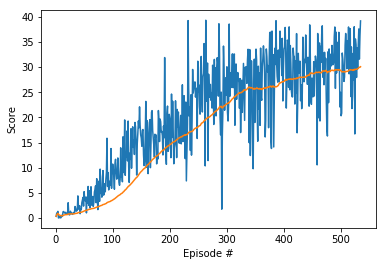

In [4]:
def ddpg(n_episodes=1000, max_t=1100):
    scores_deque = deque(maxlen=100)
    scores = []
    scores_avg =  []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]           # reset the environment 
        state = env_info.vector_observations[0]                     # get the current state
        agent.reset()                                               # reset the agent
        score = 0                                                   # initialize the score
        for t in range(max_t):
            
            
            env_info = env.step(action)[brain_name]                 # send action to tne environment
            next_state = env_info.vector_observations[0]            # get next state
            reward = env_info.rewards[0]                            
            done = env_info.local_done[0]                           
            agent.step(state, action, reward, next_state, done)     # agent takes step to train
            state = next_state                                      # Update vars
            score += reward                                                                     
            if done:                                                # exit loop if episode finished
                break 
        scores_deque.append(score)
        scores.append(score)
        scores_avg.append(np.mean(scores_deque))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, scores_avg[-1], score), end="")
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\t Final average score: {:.2f}'.format(i_episode-100,scores_avg[-1]))
            torch.save(agent.actor_local.state_dict(), 'agt_actor_check.pth')
            torch.save(agent.critic_local.state_dict(), 'agt_critic_check.pth')
            break
    return {'scores': scores , 'scores_avg':scores_avg}

scores = ddpg(700)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores['scores'])+1), scores['scores'])
plt.plot(np.arange(1, len(scores['scores_avg'])+1), scores['scores_avg'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()